## Estrutura de Bandas - redes 2D

|                                             |                                         |
|---------------------------------------------|-----------------------------------------|
| **ALUNA:** Raphaella Tamyres Siqueira Gonçalves | **ORIENTADOR:** Felipe David Crasto de Lima |
| **RA:** 220046                                  | **PERÍODO:** 4º Semestre                    |
| **DISCIPLINA:** Matéria Condensada I            | **CURSO:** Ciência, Tecnologia e Inovação   |

### Problema

Nickel bis(dithiolene) é um MOF (Metal organic framework) bidimensional [J. Am.  Chem.  Soc.  2013,135, 7, 2462–2465].  Os sítios do Nickel regem a estrutura eletrônica do sistema a baixas energias. Explore a mudança na estrutura de bandas do sistema quando alguns Ni são trocados por Pd.

### Solução

#### Nickel bis(dithiolene), Ni e Pd

O níquel é um metal de transição de número atômico 28 e o paládio também é um metal de transição de número atômico 46. Ambos fazem parte do mesmo grupo na tabela periódica (grupo 10), são resistentes a oxidação e podem formar ligas.

O Nickel bis(dithiolene) é um composto químico que contém átomos de níquel (Ni) ligados a dithiolenos. Os dithiolenos são ligantes orgânicos que contêm enxofre (S) em sua estrutura molecular. Sua fórmula sugere que há dois ligantes dithioleno acoplados a um átomo de níquel.

A estrutura específica do Nickel bis(dithiolene) pode variar dependendo dos ligantes dithioleno utilizados e das condições de síntese [2]. Os ligantes dithioleno podem ser derivados de compostos orgânicos que contêm grupos funcionais de enxofre.

Esses tipos de compostos organometálicos contendo níquel são frequentemente estudados em química de coordenação e química de organometálicos devido às suas propriedades interessantes e aplicações em catálise, eletrônica e outros campos da química [7].

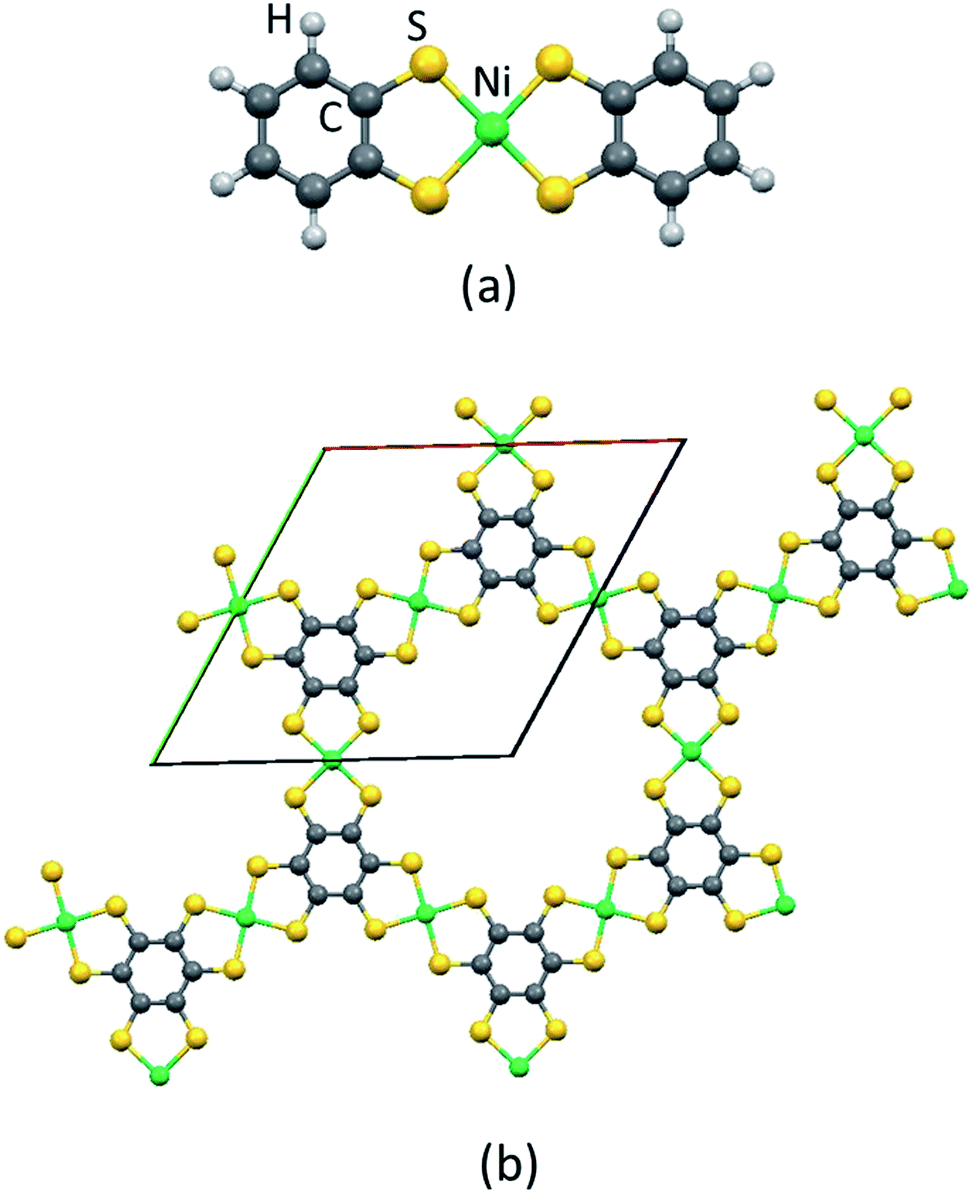

(a) Estrutura unitária do Nickel bis(dithiolene); (b) Rede hexagonal de Nickel bis(dithiolene).

Fonte: ZHOU, Jia. **Stacking interactions of nickel bis(dithiolene) with graphene and beyond**. RSC Advances, v. 4, n. 26, p. 13361–13366, 2014.

#### Rede de Kagome

A estrutura cristalina do Nickel bis(dithiolene) pode ser decomposta como uma rede de Kagome que é um padrão geométrico bidimensional composto por triângulos equiláteros interligados, formando uma malha hexagonal. Cada vértice do triângulo é compartilhado com três triângulos vizinhos [5]. A estrutura de Kagome pode ser utilizada como um modelo teórico para investigar fenômenos eletrônicos complexos, como a condutividade elétrica e as propriedades magnéticas em sólidos.

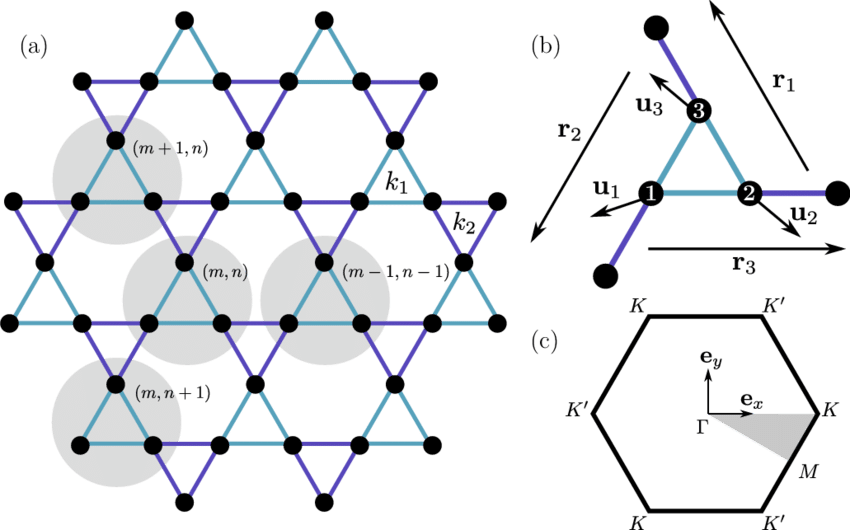

(a) Uma rede de Kagome regular; (b) Uma célula unitária triangular; (c) A primeira zona de Brillouin.

Fonte: **ResearchGate**. Disponível em: <https://www.researchgate.net/figure/a-A-regular-Kagome-lattice-edges-are-massless-springs-and-nodes-are-perfect-massive_fig2_323164706>. Acesso em: 27 set. 2023.

#### PythTB

O PythTB (*Python Tight Binding*) é uma biblioteca de código aberto em Python projetada para realizar cálculos de estrutura eletrônica em sólidos usando o método *Tight Binding* ou *TB model*. Esse método é utilizado para modelar a estrutura de bandas eletrônicas de sólidos cristalinos, semicondutores e materiais nanoestruturados, se concentrando nas ligações fortes entre os elétrons em átomos individuais em um cristal.

A ideia fundamental por trás do método *Tight Binding* é que os elétrons em um sólido cristalino não se movem independentemente uns dos outros, mas sim interagem com os núcleos atômicos e com os elétrons vizinhos através das ligações químicas. Essas interações podem ser modeladas por meio de uma abordagem onde os estados eletrônicos do sólido são construídos a partir dos estados eletrônicos dos átomos individuais e das sobreposições entre eles. [4]

O PythTB permite simular e analisar as propriedades eletrônicas de sistemas periódicos. É possível calcular as bandas de energia eletrônica, a densidade de estados, as funções de onda eletrônica, entre outras propriedades de materiais complexos, a fim de entender seu comportamento em nível quântico. A biblioteca é capaz de lidar com uma variedade de geometrias de rede, incluindo estruturas unidimensionais, bidimensionais e tridimensionais [6].

#### Bibliotecas importadas

In [1]:
# Descomente a linha abaixo, caso não tenha o PythTB instalado
# pip install pythtb

In [2]:
from pythtb import * # import TB model class
import matplotlib.pyplot as plt
import numpy as np
import random
from sympy import *

#### Caminhos possíveis entre os sítios

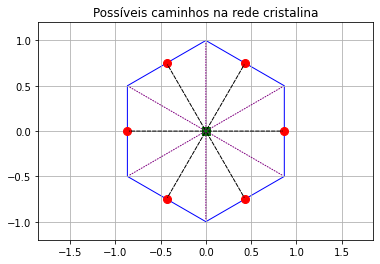

In [3]:
# Coordenadas dos vértices do hexágono
vertices = np.array([
    [0, 1],
    [np.sqrt(3) / 2, 0.5],
    [np.sqrt(3) / 2, -0.5],
    [0, -1],
    [-np.sqrt(3) / 2, -0.5],
    [-np.sqrt(3) / 2, 0.5]
])

# Coordenadas dos pontos médios das arestas do hexágono
pontos_medios = [
    [(vertices[0][0] + vertices[1][0]) / 2, (vertices[0][1] + vertices[1][1]) / 2],
    [(vertices[1][0] + vertices[2][0]) / 2, (vertices[1][1] + vertices[2][1]) / 2],
    [(vertices[2][0] + vertices[3][0]) / 2, (vertices[2][1] + vertices[3][1]) / 2],
    [(vertices[3][0] + vertices[4][0]) / 2, (vertices[3][1] + vertices[4][1]) / 2],
    [(vertices[4][0] + vertices[5][0]) / 2, (vertices[4][1] + vertices[5][1]) / 2],
    [(vertices[5][0] + vertices[0][0]) / 2, (vertices[5][1] + vertices[0][1]) / 2]
]

# Coordenadas do centro do hexágono
centro = [0, 0]

# Representação gráfica

fig, ax = plt.subplots()

# Plotando o hexágono
hexagono = plt.Polygon(vertices, closed=True, edgecolor='b', facecolor='none')
ax.add_patch(hexagono)

# Plotando os pontos médios das arestas
for ponto in pontos_medios:
    ax.plot(ponto[0], ponto[1], color='r', marker='o', markersize=8)

# Plotando o centro do hexágono
ax.plot(centro[0], centro[1], color='g', marker='s', markersize=8)

# Adicionando setas conectando os pontos médios ao centro
for ponto in pontos_medios:
    ax.annotate('', xy=(ponto[0], ponto[1]), xytext=(centro[0], centro[1]),
                arrowprops={'arrowstyle': '-', 'linestyle': 'dashed', 'color': 'k'})

# Adicionando setas conectando os vértices ao centro
for vertex in vertices:
    ax.annotate('', xy=(vertex[0], vertex[1]), xytext=(centro[0], centro[1]),
                arrowprops={'arrowstyle': '-', 'linestyle': 'dotted', 'color': 'purple'})

# Definindo limites do gráfico
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

# Configurações adicionais
ax.set_aspect('equal', adjustable='datalim')
ax.set_title('Possíveis caminhos na rede cristalina')
plt.grid(True)

# Exibindo o gráfico
plt.show()

#### Definição do Hamiltoniano

A matriz Hamiltoniana é definida com base nas funções `set_onsite` que estabelece a diagnoal principal e `set_hop` que determina a contribuição para $H_{ij}$ dos sítios $i$ e $j$ que correspondem as célula vizinha $n \vec{a}_1 + m \vec{a_2}$.

O Hamiltoniano é Hermitiano, um operador linear que satisfaz a condição de Hermiticidade. Esta condição garante que os autovalores do operador sejam números reais e seus autovetores formem uma base ortonormal. Isso significa que uma grade hexagonal como a do Nickel bis(dithiolene) pode ter os sítios de níquel simplificados em triângulos e replicados para compor essa malha hexagonal.

Num sistema degenerado, um conjunto de átomos estão separados de maneira tal que as ondas eletrônicas asociadas a eles não possam ser acopladas, eles formam uma base de estados quânticos. Quando os átomos ou sítios estão muito próximos, as funções de onda ficam superpostas. O sistema forma um conjunto de $N$ estados, onde cada novo estado será uma combinação linear dos estados $|i>$, e $N$ representará o número inicial de átomos desacoplados. Para o caso de $N$ muito grande, é formada uma banda de energia com $N$ estados, onde o centro da banda é a energia do átomo isolado. O Hamiltoniano $H$ na base de sítios $|i>$, por sua vez, não será a diagonal nesta situação e os elementos de matriz na diagonal $<i|H|i>$ serão os valores esperados de energia para cada sítio, denominados de energia de sítio $\epsilon_s^i$. Por outro lado, os elementos de matriz fora da diagonal $<i|H|j>$ estarão associados às transições de um sítio para outro (tunelamento quântico), as quais são denominadas de energia de *hopping t*. Essa energia para acoplamentos que ocorrem apenas entre os primeiros vizinhos é constante e isto acontece devido
a simetria do sistema [1]. A matriz Hamiltoniana abaixo representa essas observações:

In [4]:
e1s = symbols('ε_s^1', negative = True)
e2s = symbols('ε_s^2', negative = True)
e3s = symbols('ε_s^3', negative = True)
e4s = symbols('ε_s^4', negative = True)
e5s = symbols('ε_s^5', negative = True)
eNs = symbols('ε_s^N', negative = True)
t = symbols('t', negative = True)

H = Matrix([
[e1s, t, 0, 0, 0, 0],
[t, e2s, t, 0, 0, 0],
[0, t, e3s, t, 0, 0],
[0, 0, t, e4s, t, 0],
[0, 0, 0, t, e5s, t],
[0, 0, 0, 0, t, eNs]])

display(H)

Matrix([
[ε_s^1,     t,     0,     0,     0,     0],
[    t, ε_s^2,     t,     0,     0,     0],
[    0,     t, ε_s^3,     t,     0,     0],
[    0,     0,     t, ε_s^4,     t,     0],
[    0,     0,     0,     t, ε_s^5,     t],
[    0,     0,     0,     0,     t, ε_s^N]])

Nesta Hamiltoniana, para o caso 1D, os elementos da diagonal são as energias de cada sítio, e cada sítio se
acopla com outro mediante a energia de hopping t. A aproximação *Tight Binding* significa que a energia de cada sítio é pouca alterada em relação com a energia do sítio não perturbado pelo acoplamento (átomo, poço quântico ou quantum dot), ou seja, pode-se desprezar essa pequena mudança e usar $\epsilon_s^i = \epsilon_0$ para todo $|i>$. [1]

#### Construção do sistema no método *Tight Binding*

In [5]:
# Modelo específico
a=1

# Matriz contendo vetores de rede em coordenadas cartesianas (a_{1}, a_{2}, a_{3})
lat=[[a,0,0],[a*0.5,a*0.5*np.sqrt(3),0],[0,0,1]]

# Matriz contendo coordenadas reduzidas de todos os orbitais de ligação forte (posição dos sítios no sistema)
orb=[[0,0,0],[1./2,0,0],[0,1./2,0]]

Ni = 0
Pd = 1

sequencia_1 = [Ni,Ni,Ni]
sequencia_2 = [Pd,Pd,Pd]
sequencia_3 = [Pd,Ni,Ni]
sequencia_4 = [Pd,Pd,Ni]

# Energias dos orbitais
#e1=0
#e2=0
#e3=0

x = 0.3 # concentração de Pd em relação ao Ni

# Calcula as energias com base na concentração de Ni e Pd
def energias(x):
    # níquel (Ni) = 0
    # paládio (Pd) = 1
    if x>0 and x<=0.5:
        random.shuffle(sequencia_3)
        e1, e2, e3 = sequencia_3
    elif x>0.5 and x<1:
        random.shuffle(sequencia_4)
        e1, e2, e3 = sequencia_4
    elif x==0:
        e1, e2, e3 = sequencia_1
    elif x==1:
        e1, e2, e3 = sequencia_2
    else:
        print("Defina um valor entre 0 e 1")
    return e1, e2, e3

# Hopping de amplitude para o componente de spin para cima e para baixo
t=-1

# Dimensões do modelo
d1=3
d2=3

# Construção do modelo com as dimensões d1 e d2 correspondentes ao sistema e seu espaço recíproco
my_model=tb_model(d1,d2,lat,orb)

#Construção do Hamiltoniano (lista de energias (em unidades arbitrárias) para cada orbital)
my_model.set_onsite(list(energias(x)))  #H_{11}, H_{22}...

# Definição das possibilidades de o elétron ir para os sítios vizinhos H_{ij}
# (Hopping de amplitude, Índice do orbital bra, Índice do orbital ket, Vetor de rede - m_{a1}, n_{a2}, ...)
my_model.set_hop(t, 0, 1, [0,0,0])
my_model.set_hop(t, 0, 2, [0,0,0])
my_model.set_hop(t, 1, 2, [0,0,0])
my_model.set_hop(t, 0, 1, [-1,0,0])
my_model.set_hop(t, 0, 2, [0,-1,0])
my_model.set_hop(t, 1, 2, [1,-1,0])

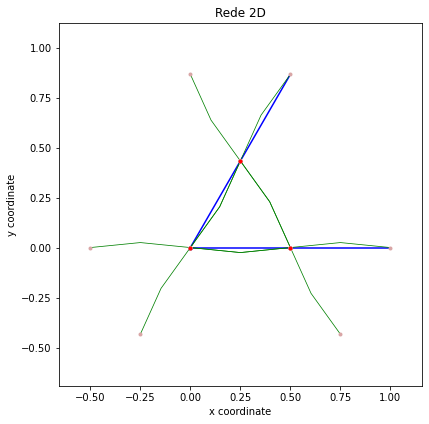

In [6]:
# Representação da célula unitária

(fig,ax)=my_model.visualize(0,1)
ax.set_title("Rede 2D")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()
#fig.savefig("celula unitária.png")

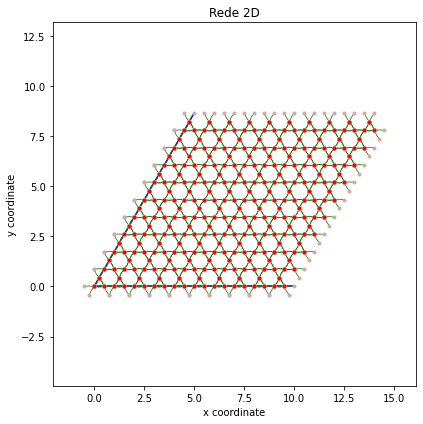

In [7]:
# Representação da supercélula

sc_tb = my_model.make_supercell([[10, 0,0], [0, 10,0], [0,0,1]])
(fig,ax)=sc_tb.visualize(0,1)
ax.set_title("Rede 2D")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()
#fig.savefig("super célula.png")

In [8]:
# Define um caminho no espaço k # Fonte: Computational Materials Science 49 (2010) 299–312
x = np.sqrt(0.1875 - (0.0625*(3/4)))
y = 0.25 * (np.sqrt(3)/2)

# Pontos de autossimetria com início em gama e fim em gama
path=[[0,0,0],[0,0.5,0],[1/3,2/3,0],[0,0,0],[-1/3,-2/3,0],[0,-0.5,0],[0,0,0]]
(k_vec,k_dist,k_node)=sc_tb.k_path(path,1001)
k_label=[r"$\Gamma$",r"$K'$", r"$M'$", r"$\Gamma$",r"$M$", r"$K$", r"$\Gamma$"]

# Solução do modelo
evals=my_model.solve_all(k_vec)

----- k_path report begin ----------
real-space lattice vectors
 [[10.       0.       0.     ]
 [ 5.       8.66025  0.     ]
 [ 0.       0.       1.     ]]
k-space metric tensor
 [[ 0.01333 -0.00667  0.     ]
 [-0.00667  0.01333  0.     ]
 [ 0.       0.       1.     ]]
internal coordinates of nodes
 [[ 0.       0.       0.     ]
 [ 0.       0.5      0.     ]
 [ 0.33333  0.66667  0.     ]
 [ 0.       0.       0.     ]
 [-0.33333 -0.66667  0.     ]
 [ 0.      -0.5      0.     ]
 [ 0.       0.       0.     ]]
reciprocal-space lattice vectors
 [[ 0.1     -0.05774  0.     ]
 [ 0.       0.11547  0.     ]
 [ 0.       0.       1.     ]]
cartesian coordinates of nodes
 [[ 0.       0.       0.     ]
 [ 0.       0.05774  0.     ]
 [ 0.03333  0.05774  0.     ]
 [ 0.       0.       0.     ]
 [-0.03333 -0.05774  0.     ]
 [ 0.      -0.05774  0.     ]
 [ 0.       0.       0.     ]]
list of segments:
  length = 0.05774  from  [0. 0. 0.]  to  [0.  0.5 0. ]
  length = 0.03333  from  [0.  0.5 0. ]  to  [

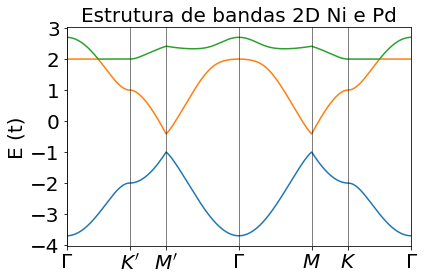

In [9]:
# Representação da estrutura de bandas

fts=20 # tamanho da fonte

fig, ax = plt.subplots()
for i in evals:
    ax.plot(k_dist, i)
ax.set_title("Estrutura de bandas 2D Ni e Pd",fontsize=fts)
ax.set_ylabel("E (t)",fontsize=fts)
ax.set_xticks(k_node)
ax.set_xticklabels(k_label,fontsize=fts)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fts)
ax.set_xlim(k_node[0],k_node[-1])
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')
fig.tight_layout()

#fig.savefig("estrutura de banda.png")

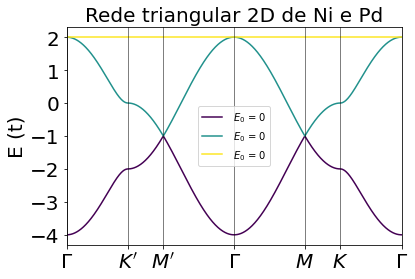

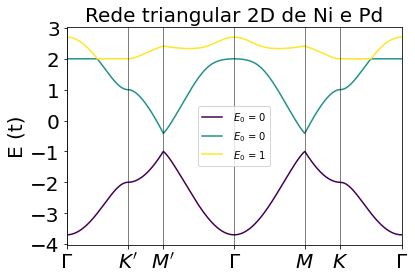

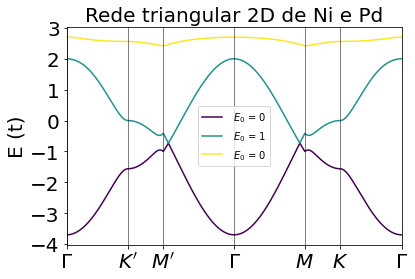

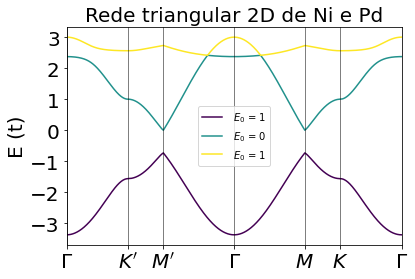

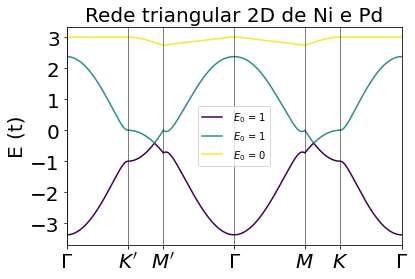

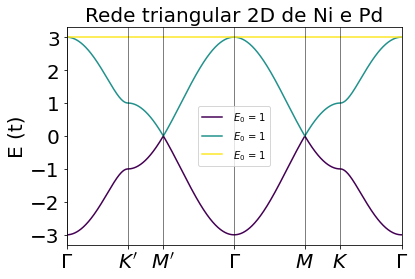

In [10]:
# Inicialização de x
x = 0

# Iteração
while x <= 1:
    
    t=-1

    d1 = 3
    d2 = 3
    
    config_energ = list(energias(x))
        
    my_model=tb_model(d1,d2,lat,orb)
    my_model.set_onsite(config_energ)  #H_{11}, H_{22}...
    
    my_model.set_hop(t, 0, 1, [0,0,0])
    my_model.set_hop(t, 0, 2, [0,0,0])
    my_model.set_hop(t, 1, 2, [0,0,0])
    my_model.set_hop(t, 0, 1, [-1,0,0])
    my_model.set_hop(t, 0, 2, [0,-1,0])
    my_model.set_hop(t, 1, 2, [1,-1,0])

    evals=my_model.solve_all(k_vec)
    
    cval = np.linspace(0,1,len(evals))
    cores = plt.get_cmap("viridis")(cval)
    
    fts=20 #font size
    fig, ax = plt.subplots()
    for i, eval_lista in enumerate(evals):
        ax.plot(k_dist, eval_lista, color=cores[i], label=f" $E_0$ = {config_energ[i]}")
        plt.legend(loc='center')
    #for i in evals:
        #ax.plot(k_dist, i)
    ax.set_title(f"Rede triangular 2D de Ni e Pd", fontsize=fts)
    ax.set_ylabel("E (t)",fontsize=fts)
    ax.set_xticks(k_node)
    ax.set_xticklabels(k_label,fontsize=fts)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fts)
    ax.set_xlim(k_node[0],k_node[-1])
    for n in range(len(k_node)):
        ax.axvline(x=k_node[n], linewidth=0.5, color='k')
    
    # Incremento no valor de x
    x += 0.2
    
    plt.show()
    #fig.savefig(f"Estrutura de bandas{x}.png")

#### Interpretação gráfica

O gráfico apresenta a estrutura de bandas das energias permitidas para os sítios de níquel(Ni) e paládio(Pd) em diferentes configurações na rede, em que as energias são Ni=0 e Pd=1. Cada átomo contribui com seus orbitais eletrônicos para a formação das bandas de energia. As energias foram calculadas para uma rede de dimensão 3x3, conforme as posições dos átomos. Observa-se nos gráficos a energia em função dos pontos de autossimetria, por isso as bandas são espelhadas em alguns momentos em relação ao eixo horizontal. Enquanto no eixo vertical são espelhadas continuamente por se tratar de uma rede periódica.

Ao longo das iterações que alteram as configurações da rede, pode-se acompanhar como a composição de átomos de níquel e paládio afeta a estrutura de bandas e como os níveis de energia dos orbitais desses átomos influenciam as energias permitidas.

A estrutura de bandas é geralmente representada ao longo da chamada zona de Brillouin. A primeira zona de Brillouin é definida como a célula primitiva de Wigner-Seitz da rede recíproca. Assim, pode ser entendida como o conjunto de pontos no espaço recíproco que está mais próximo de K = 0 do que de qualquer outro ponto recíproco da rede. A n-ésima zona de Brillouin consiste no conjunto de pontos que podem ser alcançados a partir da origem cruzando n−1 planos de Bragg distintos. [3]

No gráfico podem ser visualizadas as bandas de valência que correspondem a região onde os elétrons estão fortemente ligados aos átomos e têm energia mais baixa, as bandas de condução que representam a região onde os elétrons têm energia suficiente para condução elétrica, e os gaps de energia que são as distâncias entre essas bandas.

A forma e a dispersão das bandas eletrônicas ao longo da zona de Brillouin revelam informações sobre as propriedades eletrônicas do material. Nesse sentido, uma banda estreita e inclinada pode indicar alta mobilidade eletrônica, como ocorre nos pontos das bandas roxa e azul, enquanto uma banda larga e plana pode indicar baixa mobilidade como pode ser visto na banda amarela.

Em determinadas orientações, nota-se que o fundo da banda de condução é aproximadamente parabólico. O formato parabólico indica que os portadores de carga se comportam como partículas livres na direção observada, ou seja, o elétron se comporta como uma onda livre com uma massa efetiva aumentada (quase-partícula). [1] 

#### Análise dos resultados

Todas as possibilidades de obter Ni e Pd em posições distintas são:

In [11]:
for i in range(2):
    for j in range(2):
        for k in range(2):
            print(f"{i}{j}{k}")

000
001
010
011
100
101
110
111


- Ni-Ni-Ni

Quando todos os sítios estão ocupados por Ni verifica-se que há um gap nos pontos $K$ e $\Gamma$, mas em $M$ ocorre a transição eletrônica.

- Pd-Pd-Pd

É perceptível o mesmo fenômeno descrito anteriormente, com a diferença no deslocamento da energia no eixo y, motivado pela diferença de energia entre Pd e Ni.

- Ni-Pd-Ni

A transição eletrônica ocorre um pouco deslocada nos pontos $M'$ e $M$ em relação à $\Gamma$ entre o primeiro e segundo átomos na célula.

- Pd-Ni-Pd

A transição eletrônica ocorre mais deslocada nos pontos $M'$ e $M$ em relação à $\Gamma$ do que na configuração anterior e entre o segundo e terceiro átomos na célula.

- Pd-Pd-Ni

Há transição eletrônica entre o primeiro e segundo átomos.

- Pd-Ni-Ni

Não há transição eletrônica.

- Ni-Ni-Pd

Há transição eletrônica entre o segundo e terceiro átomos.

- Ni-Pd-Pd

Não há transição eletrônica.

A diferença entre as configurações dos átomos na rede influencia nos níveis de energia, na transição eletrônica e na abertura de gap. Isso ocorre porque com a troca de átomos, o sistema se organiza buscando a melhor estabilidade energética.

### Referências bibliográficas

[1] COSTA, Rodrigo M.; MENDOZA, Michel. **Dedução da Matriz do Hamiltoniano Tight Binding usando a discretização da Equação de Schrödinger**. Revista Brasileira de Ensino de Física, v. 42, p. e20200217, 2020.

[2] MIAO, Qingqing; GAO, Junxiong; WANG, Zeqing; et al. **Syntheses and characterization of several nickel bis(dithiolene) complexes with strong and broad Near-IR absorption**. Inorganica Chimica Acta - INORG CHIM ACTA, v. 376, p. 619–627, 2011.

[3] MISRA, Prasanta K. **Chapter 1 - Basic Properties of Crystals**. In: MISRA, Prasanta K. (Org.). Physics of Condensed Matter. Boston: Academic Press, 2012, p. 1–35.

[4] Richard M Martin. **Electronic structure: basic theory and practical methods**. Cambridge
university press, 2004.

[5] Shi, M., Yu, F., Yang, Y. et al. **A new class of bilayer kagome lattice compounds with Dirac nodal lines and pressure-induced superconductivity**. Nat Commun 13, 2773 (2022). https://doi.org/10.1038/s41467-022-30442-0

[6] YUSUFALY, Tahir; VANDERBILT, David; COH, Sinisa. **Tight-Binding Formalism in the Context of the PythTB Package**. 2022. Disponível em: https://www.physics.rutgers.edu/pythtb/. Acesso em: 27 de set. de 2023.

[7] ZHANG, Zisheng; YANG, Tilong; Qin, Peng; DANG, Li. **Nickel bis(dithiolene) complexes for electrocatalytic hydrogen evolution: A computational study**. Journal of Organometallic Chemistry. Volume 864, 1 June 2018, Pages 143-147.

### Playground

Exemplo com 10 átomos

In [12]:
# Modelo específico
a=1

# Matriz contendo vetores de rede em coordenadas cartesianas (a_{1}, a_{2}, a_{3})
lat=[[a,0,0],[a*0.5,a*0.5*np.sqrt(3),0],[0,0,1]]

# Matriz contendo coordenadas reduzidas de todos os orbitais de ligação forte (posição dos sítios no sistema)
orb = [[0, 0, 0], [1, 0, 0], [0.5, sqrt(3)/2, 0], [1.5, sqrt(3)/2, 0], [1, sqrt(3), 0], [0, sqrt(3), 0], [2, sqrt(3), 0], [0.5, 2*sqrt(3)/2, 0], [1.5, 2*sqrt(3)/2, 0], [1, 2*sqrt(3), 0]]

# Energias dos orbitais

quant_atomos = len(orb)
lista_binaria = [random.choice([0, 1]) for _ in range(quant_atomos)]
print(lista_binaria)

# Hopping de amplitude para o componente de spin para cima e para baixo
t=-1

# Dimensões do modelo
d1 = 3
d2 = 3

# Construção do modelo com as dimensões d1 e d2 correspondentes ao sistema e seu espaço recíproco
my_model = tb_model(d1, d2, lat, orb)

# Construção do Hamiltoniano com as dez energias
my_model.set_onsite(lista_binaria)

# Definição das possibilidades de o elétron ir para os sítios vizinhos H_{ij}
# (Hopping de amplitude, Índice do orbital bra, Índice do orbital ket, Vetor de rede - m_{a1}, n_{a2}, ...)
my_model.set_hop(t, 0, 1, [0,0,0])
my_model.set_hop(t, 0, 2, [0,0,0])
my_model.set_hop(t, 1, 2, [0,0,0])
my_model.set_hop(t, 0, 1, [-1,0,0])
my_model.set_hop(t, 0, 2, [0,-1,0])
my_model.set_hop(t, 1, 2, [1,-1,0])
my_model.set_hop(t, 0, 1, [0,-1,0])
my_model.set_hop(t, 0, 2, [-1,0,0])
my_model.set_hop(t, 1, 2, [1,1,0])
my_model.set_hop(t, 0, 1, [0,1,0])

[0, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [13]:
# Define um caminho no espaço k # Fonte: Computational Materials Science 49 (2010) 299–312
x = np.sqrt(0.1875 - (0.0625*(3/4)))
y = 0.25 * (np.sqrt(3)/2)

# Pontos de autossimetria com início em gama e fim em gama
path=[[0,0,0],[0,0.5,0],[1/3,2/3,0],[0,0,0],[-1/3,-2/3,0],[0,-0.5,0],[0,0,0]]
(k_vec,k_dist,k_node)=sc_tb.k_path(path,1001)
k_label=[r"$\Gamma$",r"$K'$", r"$M'$", r"$\Gamma$",r"$M$", r"$K$", r"$\Gamma$"]

# Solução do modelo
evals=my_model.solve_all(k_vec)

----- k_path report begin ----------
real-space lattice vectors
 [[10.       0.       0.     ]
 [ 5.       8.66025  0.     ]
 [ 0.       0.       1.     ]]
k-space metric tensor
 [[ 0.01333 -0.00667  0.     ]
 [-0.00667  0.01333  0.     ]
 [ 0.       0.       1.     ]]
internal coordinates of nodes
 [[ 0.       0.       0.     ]
 [ 0.       0.5      0.     ]
 [ 0.33333  0.66667  0.     ]
 [ 0.       0.       0.     ]
 [-0.33333 -0.66667  0.     ]
 [ 0.      -0.5      0.     ]
 [ 0.       0.       0.     ]]
reciprocal-space lattice vectors
 [[ 0.1     -0.05774  0.     ]
 [ 0.       0.11547  0.     ]
 [ 0.       0.       1.     ]]
cartesian coordinates of nodes
 [[ 0.       0.       0.     ]
 [ 0.       0.05774  0.     ]
 [ 0.03333  0.05774  0.     ]
 [ 0.       0.       0.     ]
 [-0.03333 -0.05774  0.     ]
 [ 0.      -0.05774  0.     ]
 [ 0.       0.       0.     ]]
list of segments:
  length = 0.05774  from  [0. 0. 0.]  to  [0.  0.5 0. ]
  length = 0.03333  from  [0.  0.5 0. ]  to  [

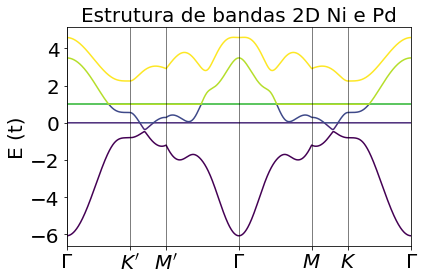

In [14]:
# Representação da estrutura de bandas

fts=20 # tamanho da fonte

cval = np.linspace(0,1,len(evals))
cores = plt.get_cmap("viridis")(cval)

fig, ax = plt.subplots()

for i, eval_lista in enumerate(evals):
    ax.plot(k_dist, eval_lista, color=cores[i])

#for i in evals:
#    ax.plot(k_dist, i)
ax.set_title("Estrutura de bandas 2D Ni e Pd",fontsize=fts)
ax.set_ylabel("E (t)",fontsize=fts)
ax.set_xticks(k_node)
ax.set_xticklabels(k_label,fontsize=fts)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fts)
ax.set_xlim(k_node[0],k_node[-1])
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')
fig.tight_layout()

#fig.savefig("estrutura de bandas playground.png")